# Probabilities from the normal distribution

You have seen how to compute the probabilities of a normally distributed random variable being in a particular interval using the tables for the values of $\Phi(x)$ - CDF of the standard normal distribution. That required standardizing the random variable by subtracting the mean and dividing it by its standard deviation so that the resulting random variable follows the standard normal distribution.

Luckily, you don't have to do this in practice, as thre're special function implementd in Pyhton to help you quickly obtain values of CDF of normal distribution with any parameter values. Same goes for computing quantiles.

In this notebook, you'll learn how to use them.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats

According to the National Health and Nutrition Examination survey, height of women can be modelled as a normally distributed random variable with mean 161 cm and standard deviation 7 cm.

In [ ]:
mu = 161
sigma = 7

## PDF Plot

Plot the corresponding probability density function.

In [ ]:
# Ypur code here

def normal_pdf(x, mu, sigma):
  return (1./(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*((x-mu)/sigma)**2)
  

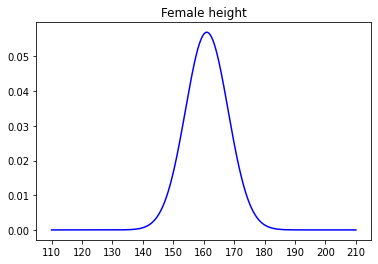

In [ ]:
x = np.linspace(110, 210, 1000)
y = normal_pdf(x, mu, sigma)

plt.plot(x, y, 'blue')
_ = plt.xticks(np.arange(min(x), max(x)+1, 10))
_ = plt.title('Female height')

## Probabilities

You can compute the values of the CDF of the normal distribution with parameters $\mu$ and $\sigma$ with the help of the [scipy.stats.norm.cdf()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) function.

What is the probability of a random woman being shorter than 150 cm?

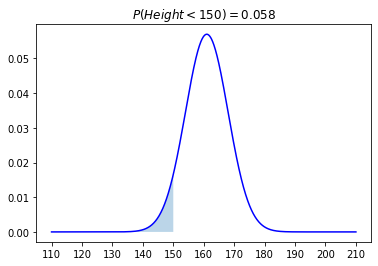

In [ ]:
# Your code here

x = np.linspace(110, 210, 1000)
y = normal_pdf(x, mu, sigma)

xx = np.linspace(110, 150, 1000)
yy = normal_pdf(xx, mu, sigma)

plt.plot(x, y, 'blue')
plt.fill_between(xx, yy, alpha=0.3)

_ = plt.xticks(np.arange(min(x), max(x)+1, 10))

p = scipy.stats.norm.cdf(150, mu, sigma)
p = np.round(p, 3)
_ = plt.title('$P(Height < 150) = $' + str(p))

What is the probability of a random woman being between 150 and 170 cm?

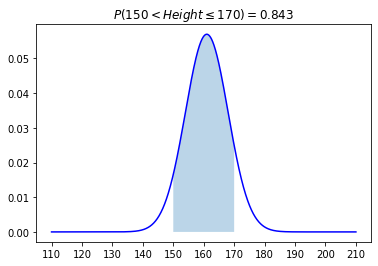

In [ ]:
# Your code here

x = np.linspace(110, 210, 1000)
y = normal_pdf(x, mu, sigma)

xx = np.linspace(150, 170, 1000)
yy = normal_pdf(xx, mu, sigma)

plt.plot(x, y, 'blue')

_ = plt.xticks(np.arange(min(x), max(x)+1, 10))

plt.fill_between(xx, yy, alpha=0.3)

p = scipy.stats.norm.cdf(170, mu, sigma) - scipy.stats.norm.cdf(150, mu, sigma)
p = np.round(p, 3)

_ = plt.title('$P(150 < Height \leq 170) = $' + str(p))

What is the probability of a random woman being taller than 175 cm?

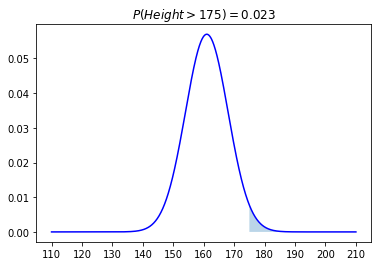

In [ ]:
# Your code here 

x = np.linspace(110, 210, 1000)
y = normal_pdf(x, mu, sigma)

xx = np.linspace(175, 210, 1000)
yy = normal_pdf(xx, mu, sigma)

plt.plot(x, y, 'blue')

_ = plt.xticks(np.arange(min(x), max(x)+1, 10))

plt.fill_between(xx, yy, alpha=0.3)

p = 1 - scipy.stats.norm.cdf(175, mu, sigma)
p = np.round(p, 3)

_ = plt.title('$P(Height > 175) = $' + str(p))

Compute the same probabilities, but now using the CDF of the standard normal distribution ($\mu = 0, \sigma = 1$), converting Height into a standard normal variable like in ours examples from the slides.

In [ ]:
# Your code here

p = scipy.stats.norm.cdf((150-mu)/sigma, 0, 1)
print('P(Height <= 150) = ' + str(np.round(p, 3)))

p = scipy.stats.norm.cdf((175-mu)/sigma, 0, 1) - scipy.stats.norm.cdf((150-mu)/sigma, 0, 1)
print('P(Height > 175) = ' + str(np.round(p, 3)))

p = 1 - scipy.stats.norm.cdf((175-mu)/sigma, 0, 1)
print('P(150 < Height <= 170) = ' + str(np.round(p, 3)))

P(Height <= 150) = 0.058
P(Height > 175) = 0.919
P(150 < Height <= 170) = 0.023


## Quantiles and more

You can compute quantiles of the normal distribution with parameters $\mu$ and $\sigma$ with the help of the [scipy.stats.norm.ppf()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) function.

According to the 65 - 95 - 99.7 rule, 65% of the data generated from a normal distribution lies within 1 standard deviation from the mean. 

Which range does the height of 95% of the women fall into?

In [ ]:
# Your code here

print('From', mu-2*sigma, 'to', mu+2*sigma, 'cm')

From 147 to 175 cm


"80% of the women are shorter than X cm". Find the value of X.

In [ ]:
# Your code here

q = scipy.stats.norm.ppf(0.8, mu, sigma)
q

166.8913486350104

"Only 5% of the women are taller than X cm". Find the value of X.

In [ ]:
# Your code here

q = scipy.stats.norm.ppf(1-0.05, mu, sigma)
q

172.5139753886603

"Only 10% of the women are shorter than X cm". Find the value of X.

In [ ]:
# Your code here

q = scipy.stats.norm.ppf(0.1, mu, sigma)
q

152.0291390411878